# 3.75km MPAS Atmosphere Output

Author: [Philip Chmielowiec](https://github.com/philipc2)

Data: [Falko Judt](https://github.com/falkojudt)

This visualization example showcases a 3.75km MPAS Atmosphere mesh, which is composed of roughly 84 million nodes and 42 million faces.

Plots of Relative Humidity (`relhum_200hPa`) and Vorticity (`vorticity_200hPa`), with both global Robinson and North Pole Centered Orthographic projections.

In [42]:
import uxarray as ux
import cartopy.crs as ccrs
import geoviews.feature as gf


def features(projection):
    return gf.coastline(projection=projection, linewidth=1, scale="50m") * gf.states(
        projection=projection, linewidth=1, scale="50m"
    )

In [6]:
grid_path = "/glade/campaign/cisl/vast/uxarray/data/dyamond/3.75km/grid.nc"
data_path = "/glade/campaign/mmm/wmr/fjudt/projects/dyamond_1/3.75km/diag.2016-08-01_00.00.00.nc"

In [7]:
uxds = ux.open_dataset(grid_path, data_path)

In [18]:
uxds.uxgrid.sizes

{'n_edge': 125829120,
 'n_node': 83886080,
 'n_max_node_faces': 3,
 'n_max_face_edges': 6,
 'n_face': 41943042,
 'two': 2,
 'n_max_face_nodes': 6}

## Face Centered Data Variable: `relhum_200hPa`

In [43]:
uxds["relhum_200hPa"]

<xarray.UxDataArray 'relhum_200hPa' (time: 1, n_face: 41943042)> Size: 168MB
[41943042 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2016-08-01
Dimensions without coordinates: n_face
Attributes:
    units:      percent
    long_name:  Relative humidity vertically interpolated to 200 hPa

:Overlay
   .Image.I     :Image   [lon,lat]   (lon_lat var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
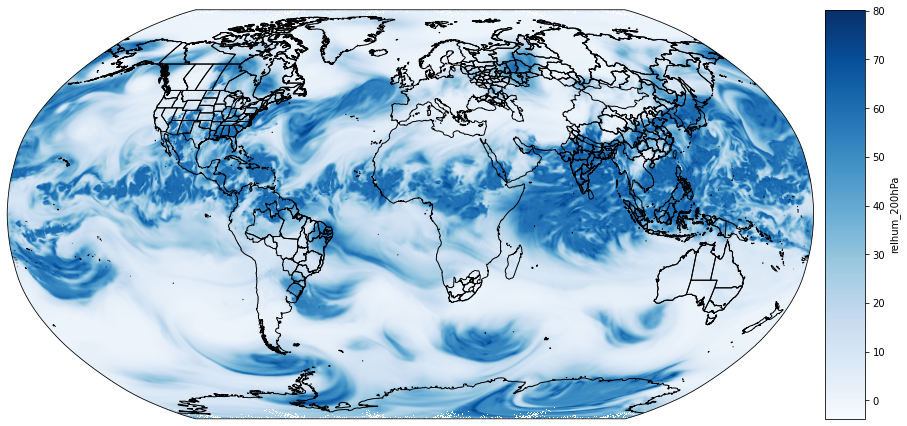

In [44]:
projection = projection = ccrs.Robinson()

uxds["relhum_200hPa"][0].plot.rasterize(
    method="point",
    projection=projection,
    backend="matplotlib",
    pixel_ratio=8.0,
    fig_size=400,
) * features(projection)

:Overlay
   .Image.I     :Image   [lon,lat]   (lon_lat var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
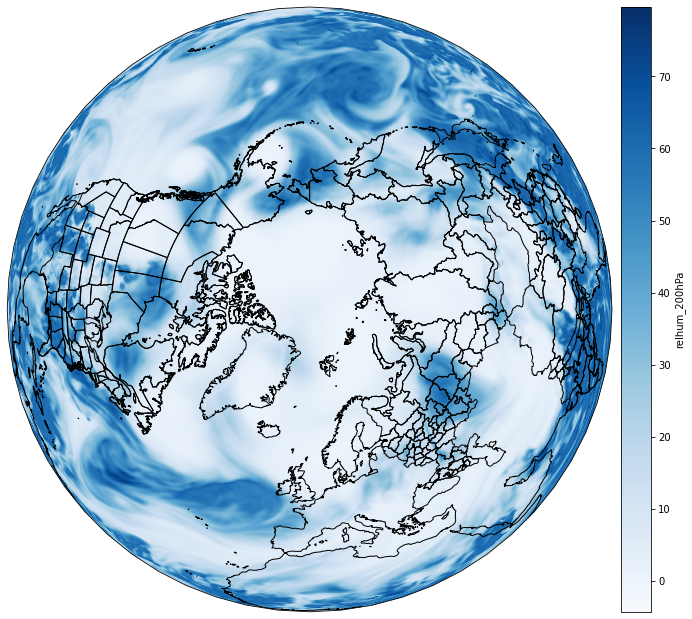

In [45]:
projection = ccrs.Orthographic(central_latitude=90)

uxds["relhum_200hPa"][0].plot.rasterize(
    method="point",
    projection=projection,
    backend="matplotlib",
    pixel_ratio=8.0,
    fig_size=250,
) * features(projection)

## Node Centered Data Variable: `vorticity_200hPa`

In [15]:
uxds["vorticity_200hPa"][0]

<xarray.UxDataArray 'vorticity_200hPa' (time: 1, n_node: 83886080)> Size: 336MB
[83886080 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2016-08-01
Dimensions without coordinates: n_node
Attributes:
    units:      s^{-1}
    long_name:  Relative vorticity vertically interpolated to 200 hPa

:Overlay
   .Image.I     :Image   [lon,lat]   (lon_lat var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
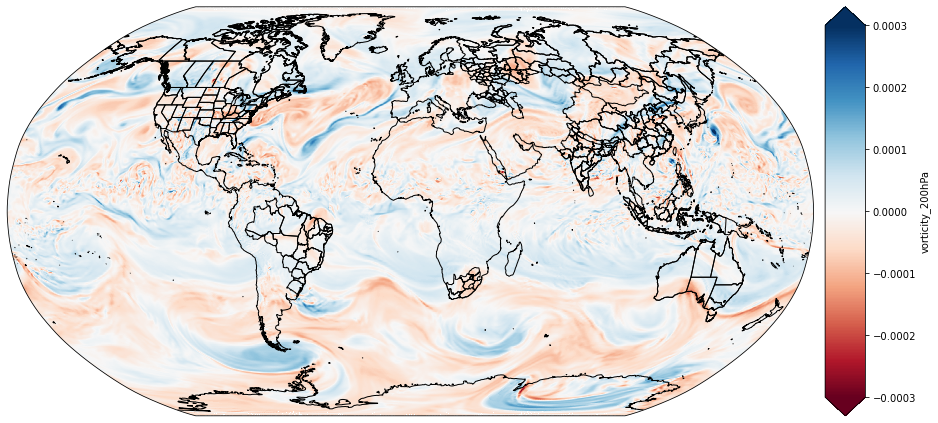

In [48]:
projection = ccrs.Robinson()

uxds["vorticity_200hPa"][0].plot.rasterize(
    method="point",
    projection=projection,
    backend="matplotlib",
    pixel_ratio=8.0,
    fig_size=400,
    cmap="RdBu",
    clim=(-0.0003, 0.0003),
) * features(projection)

:Overlay
   .Image.I     :Image   [lon,lat]   (lon_lat var)
   .Coastline.I :Feature   [Longitude,Latitude]
   .States.I    :Feature   [Longitude,Latitude]
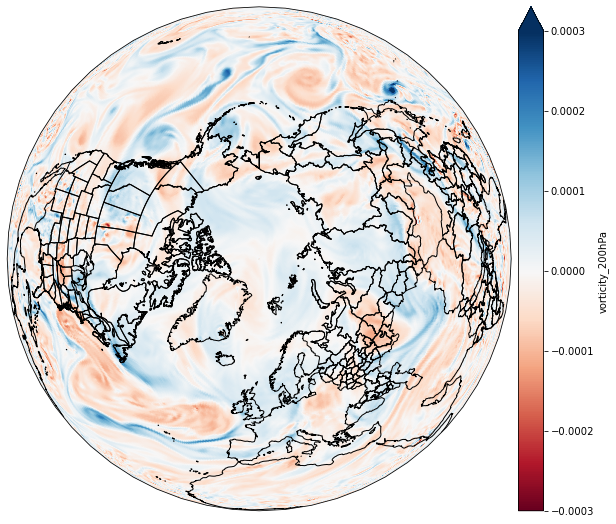

In [49]:
projection = ccrs.Orthographic(central_latitude=90)

uxds["vorticity_200hPa"][0].plot.rasterize(
    method="point",
    projection=projection,
    backend="matplotlib",
    pixel_ratio=8.0,
    fig_size=250,
    cmap="RdBu",
    clim=(-0.0003, 0.0003),
) * features(projection)